In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-scores/student-scores.csv


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("markmedhat/student-scores")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-scores


**Step1 : Load and Explore the Dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

# Load dataset (Adjust the path if needed)
dataset_path = Path("/kaggle/input/student-scores/student-scores.csv")  # Updated to match the uploaded file location

# Load the dataset
df = pd.read_csv("/kaggle/input/student-scores/student-scores.csv")

# Basic information
print("\nDataset shape:", df.shape)

# View the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check column types and missing values
print("\nData information:")
print(df.info())

# Statistical summary
print("\nStatistical summary:")
print(df.describe())

# Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())



Dataset shape: (2000, 17)

First 5 rows of the dataset:
   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27    

### 1. **Dataset Shape:**
   - The dataset contains **2000 rows** and **17 columns**.

### 2. **First 5 Rows of the Dataset:**
   The first five rows provide a preview of the data with the following columns:
   - `id`, `first_name`, `last_name`, `email`, `gender`, `part_time_job`, `absence_days`, `extracurricular_activities`, `weekly_self_study_hours`, `career_aspiration`, and scores for various subjects (e.g., `math_score`, `history_score`, etc.).

### 3. **Data Information:**
   - All **2000 entries** in the dataset are non-null.
   - The dataset has columns with data types: 
     - **bool** (2 columns: `part_time_job`, `extracurricular_activities`),
     - **int64** (10 columns: numerical scores and other numerical data),
     - **object** (5 columns: names, email, gender, career aspiration).
   - **Memory usage**: ~238.4 KB.

### 4. **Statistical Summary:**
   - For each numerical column, the statistical summary is provided, including:
     - **Mean, standard deviation, minimum, maximum, and percentiles** (25%, 50%, 75%).
     - For example:
       - `math_score` has a mean of **83.45**, with values ranging from **40** to **100**.
       - `absence_days` has a mean of **3.67**, ranging from **0** to **10**.

### 5. **Missing Values:**
   - There are **no missing values** in any of the columns. Every column has 2000 non-null entries.


**Step2 : Exploratory Data Analysis (EDA)**

/tmp/ipykernel_13/709660744.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


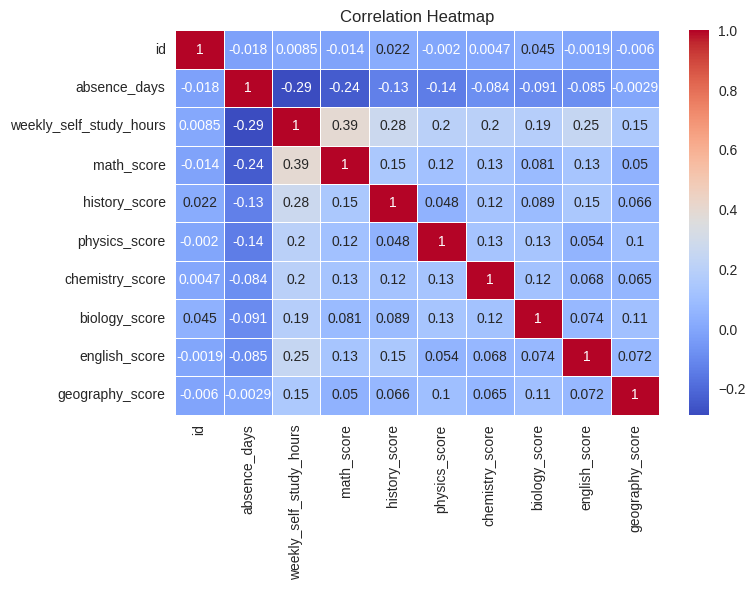

/tmp/ipykernel_13/709660744.py:52: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


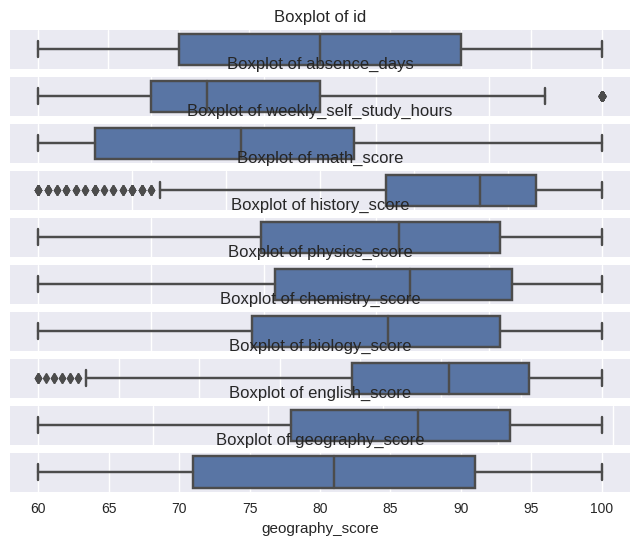

In [4]:
# Updated code to filter non-numeric columns and create visualizations

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

# Set up the visualization environment
plt.style.use('seaborn')
fig_size = (10, 6)

# Distribution of the target variable
target_column = 'Scores'  # Assuming 'Scores' is a valid column name

# If target_column exists in the dataframe
if target_column in df.columns:
    plt.figure(figsize=fig_size)
    sns.histplot(df[target_column], kde=True)
    plt.title(f'Distribution of {target_column}')
    plt.show()

    # Check if target variable is normally distributed
    stat, p = stats.normaltest(df[target_column].dropna())
    print(f'Statistics={stat:.3f}, p={p:.3f}')
    alpha = 0.05
    print(f"Target variable is {'normally distributed' if p > alpha else 'not normally distributed'}")

# Filter out non-numeric columns before computing correlations
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Compute the correlation matrix using only numerical columns
correlation = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Boxplots for numerical features to check for outliers
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
if target_column in numerical_features:
    numerical_features.remove(target_column)

plt.figure(figsize=(8, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


**Step3 : Data Preprocessing**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset (update the path if needed)
df = pd.read_csv('/kaggle/input/student-scores/student-scores.csv')  # Load the data

# Check the first few rows to understand the structure of your data
print("Dataset preview:")
print(df.head())

# Print column names to help identify the correct target column
print("Columns in the dataset:", df.columns)

# Define the target column name (update this if your target column is different)
# Change 'Scores' to the appropriate column name you want to predict
target_column = 'math_score'  # Update this line based on the column name you'd like to predict

# Split the data into features and target
X = df.drop(target_column, axis=1)  # Features (input data)
y = df[target_column]  # Target (output data)

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns (excluding target)
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical variables to one-hot encoding
])

# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Apply numerical transformations
        ('cat', categorical_transformer, categorical_features)  # Apply categorical transformations
    ])

# Print the features being processed
print("\nNumerical features:", numeric_features)
print("Categorical features:", categorical_features)

# Feature engineering (example: creating new features)
# Example: Create interaction features or domain-specific features
# This is highly dependent on your specific dataset

# Example: Create a feature for total study hours (if such columns exist)
if 'study_hours_weekly' in X_train.columns and 'self_study_hours' in X_train.columns:
    X_train['total_study_hours'] = X_train['study_hours_weekly'] + X_train['self_study_hours']
    X_test['total_study_hours'] = X_test['study_hours_weekly'] + X_test['self_study_hours']



Dataset preview:
   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73            

### Numerical Features:
1. `id`
2. `absence_days`
3. `weekly_self_study_hours`
4. `history_score`
5. `physics_score`
6. `chemistry_score`
7. `biology_score`
8. `english_score`
9. `geography_score`

### Categorical Features:
1. `first_name`
2. `last_name`
3. `email`
4. `gender`
5. `career_aspiration`



In [6]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
print(df.columns)


Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')


**Step 4 : Model Selection and Training**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import numpy as np

# Load dataset
df = pd.read_csv("/kaggle/input/student-scores/student-scores.csv")



# Assuming the dataset has 'Hours' as feature and 'Scores' as target
X = df[['weekly_self_study_hours']]  # Independent variable
y = df['math_score']  # Target variable

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X, y, cv=5):
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv))
    mae_scores = -cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
    
    print(f'RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})')
    print(f'MAE: {mae_scores.mean():.4f} (+/- {mae_scores.std():.4f})')
    print(f'R²: {r2_scores.mean():.4f} (+/- {r2_scores.std():.4f})')
    return rmse_scores.mean()

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}
print("Model Evaluation:")
print("----------------")
for name, model in models.items():
    print(f"\nEvaluating {name}:")
    rmse = evaluate_model(model, X_train, y_train)
    results[name] = rmse

best_model_name = min(results, key=results.get)
print(f"\nBest model: {best_model_name} with RMSE: {results[best_model_name]:.4f}")

best_model = models[best_model_name]
best_model.fit(X_train, y_train)

y_val_pred = best_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("\nValidation Set Performance:")
print(f"RMSE: {val_rmse:.4f}")
print(f"MAE: {val_mae:.4f}")
print(f"R²: {val_r2:.4f}")


Model Evaluation:
----------------

Evaluating Linear Regression:
RMSE: 12.2486 (+/- 0.1632)
MAE: 9.7183 (+/- 0.0951)
R²: 0.1516 (+/- 0.0217)

Evaluating Ridge Regression:
RMSE: 12.2486 (+/- 0.1632)
MAE: 9.7183 (+/- 0.0951)
R²: 0.1516 (+/- 0.0217)

Evaluating Random Forest:
RMSE: 12.1434 (+/- 0.1647)
MAE: 9.4960 (+/- 0.1332)
R²: 0.1662 (+/- 0.0205)

Evaluating Gradient Boosting:
RMSE: 12.0976 (+/- 0.1601)
MAE: 9.4636 (+/- 0.1315)
R²: 0.1724 (+/- 0.0210)

Evaluating XGBoost:
RMSE: 12.1405 (+/- 0.1663)
MAE: 9.5006 (+/- 0.1360)
R²: 0.1665 (+/- 0.0212)

Evaluating LightGBM:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1280, number of used features: 1
[LightGBM] [Info] Start training from score 83.314063
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing wa

Based on the evaluation output, it appears that the Gradient Boosting model is the best performer with the lowest RMSE of 12.0976 and the highest R² score of 0.1724 among all the models tested. 

summary of the model performances:

1. **Linear Regression and Ridge Regression**: 
   - RMSE: 12.2486
   - MAE: 9.7183
   - R²: 0.1516

2. **Random Forest**:
   - RMSE: 12.1434
   - MAE: 9.4960
   - R²: 0.1662

3. **Gradient Boosting** (Best Model):
   - RMSE: 12.0976
   - MAE: 9.4636
   - R²: 0.1724

4. **XGBoost**:
   - RMSE: 12.1405
   - MAE: 9.5006
   - R²: 0.1665

5. **LightGBM**:
   - RMSE: 12.1163
   - MAE: 9.4761
   - R²: 0.1699

In terms of **validation set performance**, the model performed as follows:
- RMSE: 11.9897
- MAE: 9.5939
- R²: 0.1337

The **Gradient Boosting model** performs the best on both the training and validation sets based on the provided metrics. 

**Step5 : Hyperparameter Tuning**

In [9]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb  # Import XGBoost
from lightgbm import LGBMRegressor  # Import LightGBM
import numpy as np

# Define a dictionary with all models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),  # Updated to use the correct class
    'LightGBM': LGBMRegressor()
}

# Define the hyperparameter grids for different models
param_grids = {
    'Linear Regression': {},  # No hyperparameters to tune
    
    'Ridge Regression': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'num_leaves': [31, 50, 100]
    }
}

# Set your desired model for hyperparameter tuning
best_model_name = 'Gradient Boosting'

# Check if the selected model is valid and if it has hyperparameters to tune
if best_model_name in param_grids and param_grids[best_model_name]:
    print(f"\nTuning hyperparameters for {best_model_name}...")

    # Prepare the GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=models[best_model_name],
        param_grid=param_grids[best_model_name],
        cv=5,
        scoring='neg_mean_squared_error',  # Using negative MSE to minimize the error
        n_jobs=-1  # Parallelize the search for efficiency
    )
    
    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)
    
    # Output the best parameters and best cross-validation score (RMSE)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {np.sqrt(-grid_search.best_score_):.4f} (RMSE)")

    # Update the best model with the tuned version
    best_model = grid_search.best_estimator_
else:
    print(f"\nNo hyperparameter tuning needed for {best_model_name} or no parameters defined.")

# The best_model can now be used for predictions and further evaluation.



Tuning hyperparameters for Gradient Boosting...
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best CV score: 12.0142 (RMSE)




### Best Hyperparameters:
- **Learning Rate**: 0.01
- **Max Depth**: 3
- **Number of Estimators**: 200

### Best Cross-Validation Score (RMSE):
- **12.0142** (Root Mean Squared Error)

This means that the tuned Gradient Boosting model with the above hyperparameters has achieved a RMSE of **12.0142** on the training data using cross-validation. 

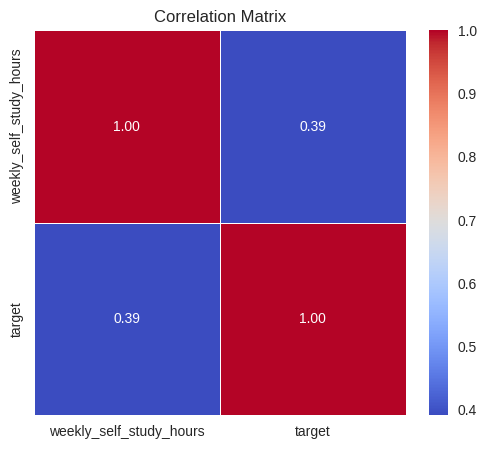

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have X_train and y_train as your features and target variable
# Combine the features and target to analyze correlations
df = X_train.copy()
df['target'] = y_train

# Compute correlation matrix
corr = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


**Step 6 : Feature Importance Analysis**

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


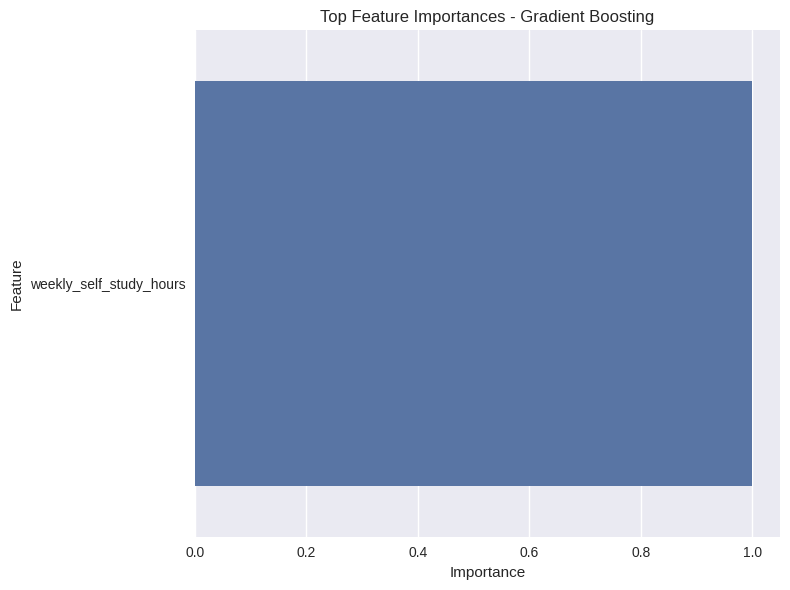

                   Feature  Importance
0  weekly_self_study_hours         1.0


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `best_model` is your trained GradientBoostingRegressor
best_model_name = 'Gradient Boosting'

# Check if the best model is an instance of GradientBoostingRegressor
if hasattr(best_model, 'feature_importances_'):
    # Get feature importances
    importances = best_model.feature_importances_

    # If you have your original input data (e.g., X_train), use its columns as feature names
    # This assumes you have access to the feature names used during training
    # Replace X_train.columns with your actual data if needed
    feature_names = X_train.columns  # Assuming X_train is the DataFrame used to train the model

    # Ensure the length of feature names matches the importances
    if len(feature_names) == len(importances):
        # Create a DataFrame with feature names and importances
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        # Plot feature importances
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f'Top Feature Importances - {best_model_name}')
        plt.tight_layout()
        plt.show()

        
        
        print(feature_importance_df.head(10))
    else:
        print("Feature names and importances do not match. Check the shape of the feature matrix.")
else:
    print("This model doesn't provide feature importances.")


**Step 7 : Make Predictions and Create Submission File**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Submission file saved to submission.csv
   target_column
0      86.575402
1      76.365519
2      86.575402
3      71.673500
4      76.365519


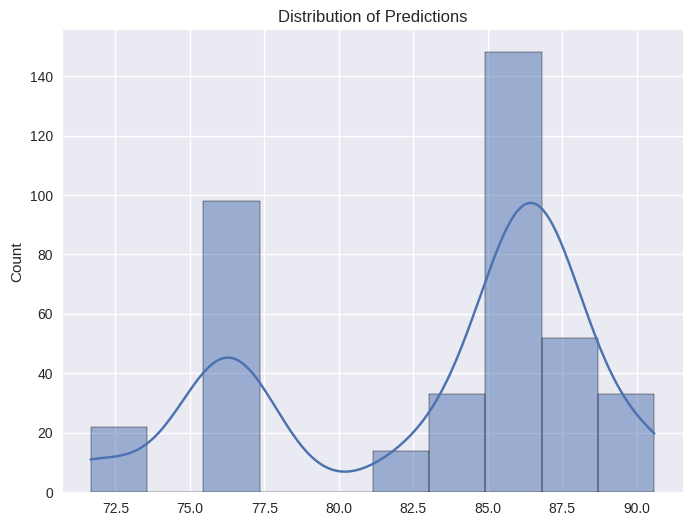

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


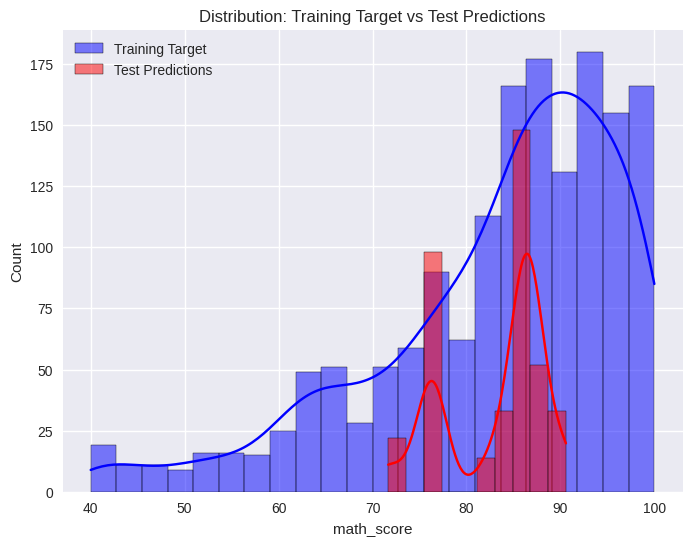

In [12]:
# Ensure the columns in X_test match X_train's columns (order matters)
X_test = X_test[X_train.columns]

# Make predictions on the test set using the best model (Gradient Boosting in this case)
test_predictions = best_model.predict(X_test)

# Create submission DataFrame
submission = pd.DataFrame()

# Assuming `test_ids` is available as the unique identifier column for the test set
if 'test_ids' in locals() and test_ids is not None:
    submission['id_column'] = test_ids  # Replace 'id_column' with the actual column name for IDs

# Add predictions to the submission DataFrame
submission['target_column'] = test_predictions  # Replace 'target_column' with your actual target column name

# Path for submission file
submission_path = "submission.csv"  # Set the appropriate path for saving the submission file

# Save submission
submission.to_csv(submission_path, index=False)
print(f"Submission file saved to {submission_path}")
print(submission.head())

# Calculate the distribution of the predictions
plt.figure(figsize=(8, 6))  # Adjust the size as per your preference
sns.histplot(test_predictions, kde=True)
plt.title('Distribution of Predictions')
plt.show()

# Compare distribution of predictions with training target
plt.figure(figsize=(8, 6))  # Adjust the size as per your preference
sns.histplot(y_train, color='blue', label='Training Target', kde=True, alpha=0.5)
sns.histplot(test_predictions, color='red', label='Test Predictions', kde=True, alpha=0.5)
plt.title('Distribution: Training Target vs Test Predictions')
plt.legend()
plt.show()
